In [10]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])
dataFrm.sample(3)

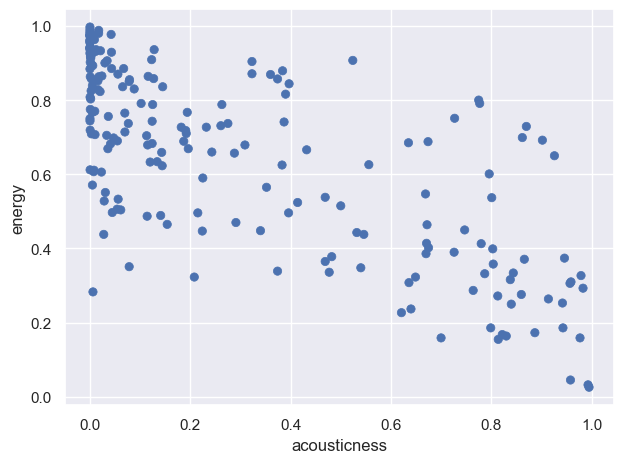

In [12]:
# Scatterplot mit Seaborn Objects erstellen
so.Plot(dataFrm.sample(200), x="acousticness", y="energy").add(so.Dot()).label(
    xlabel="X-Werte",
    ylabel="Y-Werte"
).scale(
    color_continuous="#1f77b4"  # Optionale Anpassung der Farbe
).show()

# Zeigt das die songs mit den meisten Energy auch am warscheinlichsten keine Austischen Teile dabei

<Axes: >

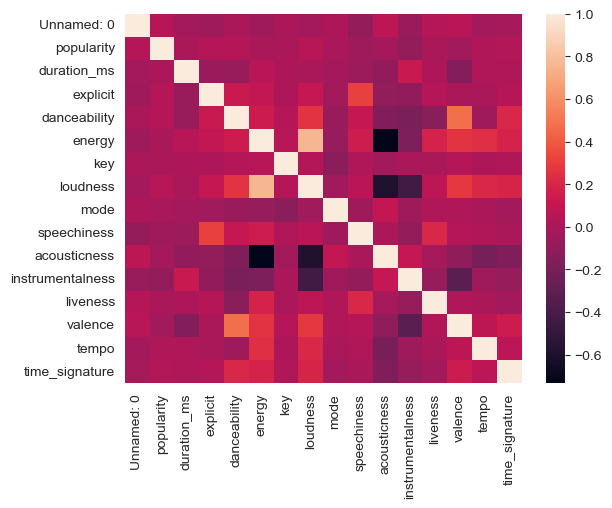

In [13]:
sns.heatmap(dataFrm.corr(numeric_only=True))